<a href="https://www.kaggle.com/code/varshinipj/scraping-data-and-images-from-a-shopping-site?scriptVersionId=110007859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<html>
<body>

<h1 style="background-color:lightgreen;""font-size:300%;">SCRAPING A SMALL BUSINESS SITE</h1>
</body>
</html>


In simple terms, Web scraping, web harvesting, or web data extraction is an automated process of collecting large data(unstructured) from websites. The user can extract all the data on particular sites or the specific data as per the requirement. The data collected can be stored in a structured format for further analysis.


<html>
<body>

<h3 style="background-color:beige;">NOTE: This scraping activity was carried on with a good motive of supporting black-owned small businesses. Its a part of my personal project "Fashion Recommendation System". The scraped data is classified using a deep learning model based on colours and patterns and then the recommender module was connected to a UI powered by streamlit. When a user uploads a pictures for reference, they get back similar recommendations with product pictures, price and link to the product.</h3>
</body>
</html>

# BeautifulSoup for scraping data:

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Requests for scraping images:

In [ ]:
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

<html>
<body>
<h3 style="background-color:beige;">We're going to scrape product names, product links, product images and prices from the site "NACLO APPAREL".</h3>
</body>
</html>

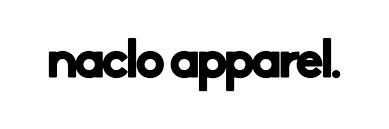

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">SETTING BASEURL AND HEADERS:</h2>
</body>
</html>

In [ ]:
baseurl = "https://shopnaclo.com/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
    }

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">SCRAPING PRODUCT NAMES:</h2>
</body>
</html>

In [ ]:
PIL.Image.open("../input/scraping-pics/prodname.jpg")

* Go to the website that you want to scrape, right click -> Inspect
* Navigate through the website structure's HTML and JS scripts and reach the desired part that you want to scrape.
* Add the tag names and class names in the scraper code like the following:

In [ ]:
product_names=[]
k = requests.get(f'https://shopnaclo.com/collections/all')
soup = BeautifulSoup(k.content, "lxml")
for product in soup.findAll("p",class_="grid__title"):
    product_names.append(product.text)

In [ ]:
productnames=[]
for i in product_names:
    x = re.sub("\n        ","",i)
    y = re.sub("\n      ","",x)
    productnames.append(y)

In [ ]:
productnames


<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">SCRAPING PRODUCT LINKS:</h2>
</body>
</html>

In [ ]:
PIL.Image.open("../input/scraping-pics/prodlink.jpg")

In [ ]:
productlinks,product_links=[],[]
productlist = soup.find_all("div",class_="product-grid-item")

for item in productlist:
    #print(item)
    for link in item.find_all("a",href=True):
        product_links.append(baseurl + link['href'])
    productlinks = list(dict.fromkeys(product_links))
print(len(productlinks))

In [ ]:
 productlinks

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">SCRAPING PRODUCT PRICES:</h2>
</body>
</html>

In [ ]:
PIL.Image.open("../input/scraping-pics/prodprice.jpg")

In [ ]:
prices=[]
k = requests.get(f'https://shopnaclo.com/collections/all')
soup = BeautifulSoup(k.content, "lxml")
for price in soup.find_all("span",class_="price"):
    prices.append(price.text)

In [ ]:
prices

Little bit of formatting:

In [ ]:
pricelist=[]
for i in prices:
    x = re.sub("\n          From \n          ","",i)
    y = re.sub("\n        ","",x)
    z = re.sub("    ","",y)
    pricelist.append(z)

In [ ]:
pricelist

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">SCRAPING IMAGE LINKS:</h2>
</body>
</html>

In [ ]:
PIL.Image.open("../input/scraping-pics/imagelink.jpg")

The below code gets the links to all the images of the product. We need only one link and all the images have dynamic links, in which we can substitute the image width of our choice. I'm choosing 180.

In [ ]:
images_links=[]
k = requests.get(f'https://shopnaclo.com/collections/all')

soup = BeautifulSoup(k.content, "lxml")
image_list = soup.find_all("img",class_="lazyload fade-in collection__image__top")
for element in image_list:
    images_links.append(element['data-src'])
images_links = list(dict.fromkeys(images_links))

In [ ]:
for i in range(len(images_links)):
    images_links[i] =  re.sub("{width}","180",images_links[i])
images_links   

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">CHECKING THE DIMENSIONS:</h2>
</body>
</html>

In [ ]:
len(images_links)

In [ ]:
len(pricelist)

In [ ]:
len(productnames)

In [ ]:
len(productlist)

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">CREATING THE DATAFRAME:</h2>
</body>
</html>

In [ ]:
df = pd.DataFrame({
    "Product Link": productlinks,
    "Image Link":images_links,
    "Price":pricelist,
    "Product Name":productnames})
df.to_csv("NacloApparel.csv",index=False)
df

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">SCRAPING PRODUCT IMAGES:</h2>
</body>
</html>

In [ ]:
prodlinks = df['Image Link']
for i in range(len(prodlinks)):
    urllib.request.urlretrieve(("https:"+ prodlinks[i]), f"./{i}.jpg")

<html>
<body>
<h2 style="background-color:lightgreen;""font-size:300%;">DISPLAYING SCRAPED IMAGE:</h2>
</body>
</html>

In [ ]:
import PIL 

PIL.Image.open("./29.jpg")

Disclaimer: The above scraped data has been used for research purposes only.